## EMPLOYEE EXIT SURVEY

**The goal of the analysis is to answer the following questions:**
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**The source:**
* exit survey from employees of the Department of Education, Training and Employment (DETE) in Queensland, Australia
* exit survey from employees of the Technical and Further Education (TAFE) institute  in Queensland, Australia

A data dictionary wasn't provided with the dataset, so to confirm the definitions of the data, a manager who worked the surveys had to be contacted in person.

**Columns of significance (DETE survey):**
* `ID` - An ID used to identify the participant of the survey
* `SeparationType` - The reason why the person's employment ended
* `Cease Date` - The year or month the person's employment ended
* `DETE Start Date` - The year the person began employment with the DETE
* `Age` - Age of the participant of the survey

**Columns of significance (TAFE survey):**
* `Record ID` - An ID used to identify the participant of the survey
* `Reason for ceasing employment` - The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in Years)` - The lenght of the person's employment (in years)
* `Current Age. Current Age` - Age of the participant of the survey


In [1]:
import numpy as np
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### DETE survey dataset information

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### The columns of significance in DETE survey (`ID`, `SeparationType`, `Cease Date`, `DETE Start Date`, `Age`) are all, apart from the `ID` column, of object dtype. `ID` column is of int64 dtype. All columns are non-nulls.
#### There are NaN values in the dataframe as well.

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

### `SeparationType` and `Age` columns value counts:

In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

### `Cease Date` and `DETE Start Date` columns value counts:

In [7]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
07/2014         2
04/2014         2
08/2012         2
02/2014         2
09/2014         1
2010            1
2014            1
09/2010         1
07/2012         1
07/2006         1
11/2012         1
Name: Cease Date, dtype: int64

In [8]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
2013          21
1970          21
1975          21
1990          20
2005          20
1996          19
1999          19
1992          18
2004          18
2000          18
1991          18
1989          17
1978          15
2003          15
1976          15
1988          15
2002          15
1974          14
1998          14
1979          14
1995          14
1980          14
1997          14
1993          13
1972          12
1986          12
1977          11
1971          10
1969          10
1984          10
2001          10
1994          10
1983           9
1981           9
1973           8
1985           8
1987           7
1963           4
1982           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

### TAFE survey dataset information

In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [10]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### `Reason for ceasing employment` column value counts:

In [11]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

### `LengthofServiceOverall. Overall Length of Service at Institute (in Years)` column values counts:

In [12]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

### Cleaning up the 'Not Stated' values in DETE dataframe:

In [13]:
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])

In [14]:
dete_survey['DETE Start Date'].value_counts()

2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
2013.0    21
1970.0    21
1975.0    21
1990.0    20
2005.0    20
1999.0    19
1996.0    19
1992.0    18
2004.0    18
1991.0    18
2000.0    18
1989.0    17
1976.0    15
1988.0    15
2002.0    15
2003.0    15
1978.0    15
1995.0    14
1979.0    14
1974.0    14
1980.0    14
1998.0    14
1997.0    14
1993.0    13
1986.0    12
1972.0    12
1977.0    11
1971.0    10
1994.0    10
1969.0    10
2001.0    10
1984.0    10
1981.0     9
1983.0     9
1973.0     8
1985.0     8
1987.0     7
1982.0     4
1963.0     4
1968.0     3
1967.0     2
1965.0     1
1966.0     1
Name: DETE Start Date, dtype: int64

### Removing the columns from the DETE survey dataframe that have unclear data and will not be used in the analysis:

In [15]:
dete_survey.iloc[:, 28:49]

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,SA,N,D,D,A,N,N,D,A,N,...,A,N,SA,SA,N,D,A,A,A,SA
818,A,SA,D,D,D,A,A,N,A,N,...,A,N,A,N,N,A,A,N,N,N
819,A,A,A,A,A,D,N,A,A,A,...,A,A,A,A,A,A,A,A,N,A
820,A,D,D,A,SD,SD,SD,A,D,SD,...,D,A,A,N,N,N,SD,A,N,A


In [16]:
dete_survey_updated = dete_survey.drop(dete_survey.iloc[:, 28:49], axis=1)

In [17]:
dete_survey_updated

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


### Removing the columns from the TAFE survey dataframe that will not be used in the analysis:

In [18]:
tafe_survey.iloc[:, 17:66]

,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,...,InductionInfo. On-line Topic:Did you undertake a Institute Induction?,InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?,InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?,InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.],InductionInfo. Induction Manual Topic: Did you undertake Team Induction?,Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?
0,NaN,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
1,NaN,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
2,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
3,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,-,-,-,-,-,Yes,Yes,Yes,Yes,Yes
4,NaN,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,NaN,Neutral,Agree,Agree,Neutral,Disagree,Neutral,Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,Agree,Strongly Agree,Strongly Agree,Neutral,Agree,Agree,Agree,Agree,Agree,...,-,Induction Manual,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
700,NaN,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Agree,Neutral,Neutral,Strongly Agree,...,-,-,Face to Face,-,-,No,No,No,Yes,No


In [19]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.iloc[:, 17:66], axis=1)

In [20]:
tafe_survey_updated

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


### Changing the names of the columns that contain same kind of input in both of the dataframes, so that it is possible to combine them later on.

Both dataframes have the same kind of values for these columns:
* `ID` (DETE) and `Record ID` (TAFE)
* `SeparationType` (DETE) and `Reason for ceasing employment` (TAFE)
* `Cease Date` (DETE) and `CESSATION YEAR` (TAFE)
* `Age` (DETE) and `Current Age. Current Age` (TAFE)
* `Gender` (DETE) and `Gender. What is your Gender?` (TAFE)

In [21]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [22]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [23]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [24]:
tafe_survey_updated.rename(columns={'Record ID': 'id',
                                   'CESSATION YEAR': 'cease_date',
                                  'Reason for ceasing employment':'separationtype',
                                  'Gender. What is your Gender?':'gender',
                                  'CurrentAge. Current Age':'age',
                                  'Employment Type. Employment Type':'employment_status',
                                  'Classification. Classification':'position',
                                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                   'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, inplace=True)

In [25]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [26]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### What sort of reasons are there that cause employees to resign:

In [27]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [28]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

**Selecting only the data for survey respondents who have a `Resignation` separation type:**

In [29]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [30]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


In [31]:
dete_resignations_1 = dete_survey_updated.loc[dete_survey_updated['separationtype'] == 'Resignation-Other reasons'].copy()
dete_resignations_2 = dete_survey_updated.loc[dete_survey_updated['separationtype'] == 'Resignation-Other employer'].copy()
dete_resignations_3 = dete_survey_updated.loc[dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate'].copy()
dete_resignations = pd.concat([dete_resignations_1, dete_resignations_2, dete_resignations_3], ignore_index=True)

In [32]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,800,Resignation-Move overseas/interstate,NaN,1995.0,NaN,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
307,804,Resignation-Move overseas/interstate,12/2013,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
309,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


**Checking uniques in `cease_date` and `dete_start_date`, and standardizing values:**

In [33]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [34]:
dete_resignations.cease_date = dete_resignations.cease_date.str.extract(r"(\d{4})")

In [35]:
# converting the cease_date column to float
dete_resignations.cease_date = dete_resignations.cease_date.astype('float')
dete_resignations.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [36]:
tafe_resignations.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [37]:
dete_resignations.dete_start_date.value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [38]:
pd.set_option('display.max_columns', 35)
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,800,Resignation-Move overseas/interstate,NaN,1995.0,NaN,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
307,804,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
309,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [39]:
dete_resignations.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [68]:
# how many NaNs in cease_date column
dete_resignations.cease_date.isnull().sum()

11

In [41]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


**In order to get the number of years employees have spent in service, a new column `institute_service` has to be created, with values that will be equal to  `cease_date` values minus `dete_start_date` values.**

**

In [42]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
pd.set_option('display.max_columns', 36)
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,800,Resignation-Move overseas/interstate,NaN,1995.0,NaN,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,NaN
307,804,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0
309,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0


**Possible reasons of employees' dissatisfaction at work:**

**DETE:**
* interpersonal_conflicts
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

**TAFE:**
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction
* Contributing Factors. Interpersonal Conflict

**All the aforedmentioned DETE columns have only True and False values, whereas the TAFE columns have '-', NaN and string columns. That is why we must first convert values in TAFE columns to True, False and NaN. After that we can proceed with combining dataframes.**

In [43]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [44]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array(['-', 'Contributing Factors. Dissatisfaction ', nan], dtype=object)

In [45]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [46]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array(['-', 'Job Dissatisfaction', nan], dtype=object)

**In `Contributing Factors. Dissatisfaction` there are:**
* confirmed 'dissatisfactions' (55)
* NaN (8)
* all the rest are '-'

**In `Contributing Factors. Job Dissatisfaction` there are:**
* confirmed 'job dissatisfactions' (62)
* NaN (8)
* all the rest are '-'

**We need to convert all the 'dissatisfactions' and 'job dissatisfaction' values to True, '-' to False and NaN to np.nan, and copy all the results into a new column `dissatisfied`.**

In [47]:
# function for converting values to True, False and NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [48]:
select_cols = ['Contributing Factors. Dissatisfaction', 
              'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[select_cols].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [49]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

**All the columns of significance in DETE survey already have only TRUE and FALSE values:**

In [50]:
cols = ['job_dissatisfaction',
        'dissatisfaction_with_the_department',
        'physical_work_environment',
        'lack_of_recognition',
        'lack_of_job_security',
        'work_location',
        'employment_conditions',
        'work_life_balance',
        'workload']
for col in cols:
    print(dete_resignations[col].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


In [51]:
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [52]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

### COMBINING DATAFRAMES (aggregating data according to `institute_service` column)

**1) Adding a new column `institute` to both of the dataframes (containing DETE or TAFE values in each of their rows), that will allow us to easily distinguish between the tow.**

**2) Combining the dataframes and creating the new `combined` dataframe**

**3) Dropping columns with less than 500 non-null values in newly created `combined` dataframe**

In [53]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [54]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [55]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [56]:
# checking the number of non-null values in columns
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [57]:
# dropping columns with less than 500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


In [58]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,13.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,DETE
4,17.0,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE


**To answer the question** _Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?_ **,we should examine `institute_service` column which tells us how many years have particular employee spent at work.**

In [59]:
combined_updated.institute_service.value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


**To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article: https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.**

**CATEGORIES:**
- **New (Newbie)** - less than 3 years at a company
- **Experienced (Sophomore)** - 3-6 years at a company
- **Established (Tenured)** - 7-10 years at a company
- **Veteran (Sage)** - 11 or more years at a company

In [60]:
# extract only numbers from string and then convert it to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract('(\d+)').astype(float)

In [61]:
combined_updated.institute_service.value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      8
15.0      7
22.0      6
10.0      6
14.0      6
12.0      6
17.0      6
18.0      5
16.0      5
23.0      4
24.0      4
32.0      3
39.0      3
19.0      3
21.0      3
30.0      2
36.0      2
25.0      2
28.0      2
26.0      2
33.0      1
38.0      1
34.0      1
31.0      1
41.0      1
27.0      1
35.0      1
29.0      1
49.0      1
42.0      1
Name: institute_service, dtype: int64

In [62]:
def set_category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val <= 6:
        return 'Experienced'
    elif val >6 and val <= 10:
        return 'Established'
    elif val > 10:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(set_category)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [63]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,1.300000e+01,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE,Veteran
4,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN
...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5.0,False,TAFE,Experienced
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1.0,False,TAFE,New
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5.0,False,TAFE,Experienced


### ANALYSIS

In [64]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [65]:
# replacing all the missing (NaN) values with False (since most of the values in dissatisfied column are False)
combined_updated = combined_updated.fillna(False)

In [66]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

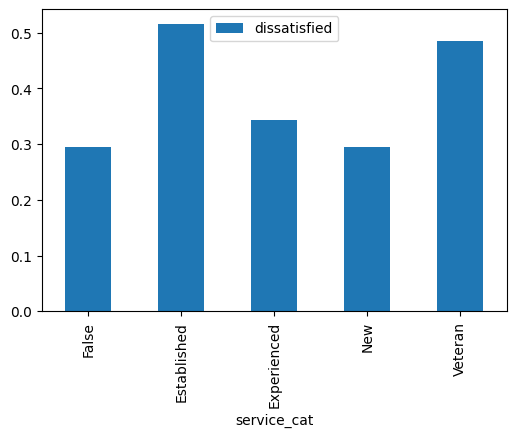

In [67]:
# creating pivot table to calcualte percentage of dissatisfied employee in each group
dissatisfied_perc = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# plotting the results
%matplotlib inline
dissatisfied_perc.plot(kind='bar')

**As we can see, the most employees whose resignaed due to dissatisfaction are from group Established (7-10 years at a company) and Veteran (11 or more years at a company). We can say that every second person who leave job, because they were dissatisfied has 7 years exeprience or more.**